# Objective

To build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads.

In [217]:
# Importing the basic libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [218]:
import warnings
warnings.filterwarnings('ignore')

# Steps to follow

1. Reading & Understanding the Dataset
2. Preparing the DataFrame for Modeling
3. Modeling
4. Evaluating the Model
5. Final Prediction
6. Conclusion

# Machine Learning Libraries & Classes

1. Scikit Learn - preprocessing, metrics, feature_selection
2. Stats Models api - GLM

# 1.Reading and understanding the data

In [219]:
path = 'Leads.csv'
leads = pd.read_csv(path)

In [220]:
# Dropping the duplicated rows in case of any
leads = leads.drop_duplicates()
leads.shape

(9240, 37)

In [221]:
initial_shape = leads.shape
initial_shape

(9240, 37)

In [222]:
leads.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened


In [223]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Inference :
1. There are few categorical variables present in this dataset for which we will need to create dummy variables.
2. There are a lot of null values, they needs to be treated accordingly.

In [224]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [225]:
# User Defined Function to see the null values and null values distrbution in the data set

def see_nulls(df):

    null_count = df.isnull().sum()
    null_perc = round(df.isnull().mean()*100)

    nulls = pd.DataFrame({"count_nulls" : null_count,"%nulls" : null_perc})
    nulls.sort_values(by = 'count_nulls', ascending = False, inplace = True)
    
    return nulls

In [226]:
see_nulls(leads)

,count_nulls,%nulls
Lead Quality,4767,52.0
Asymmetrique Activity Index,4218,46.0
Asymmetrique Profile Score,4218,46.0
Asymmetrique Activity Score,4218,46.0
Asymmetrique Profile Index,4218,46.0
Tags,3353,36.0
Lead Profile,2709,29.0
What matters most to you in choosing a course,2709,29.0
What is your current occupation,2690,29.0
Country,2461,27.0


### Inference :
* There are a lot of missing values in the data set, the columns with high number of mising values are not useful for objective.
* since we have around 9000 datapoints, we need to drop those variables with more than 3000 missing values in it.

In [227]:
# Dropping all coulmns having more than 3000 rows of null values

null_count = leads.isnull().sum()
drop_high_null_cols = leads.columns[ null_count > 3000 ]

leads.drop(columns = drop_high_null_cols, inplace = True)

In [228]:
# Checking the null values again
see_nulls(leads)

,count_nulls,%nulls
What matters most to you in choosing a course,2709,29.0
Lead Profile,2709,29.0
What is your current occupation,2690,29.0
Country,2461,27.0
How did you hear about X Education,2207,24.0
Specialization,1438,16.0
City,1420,15.0
Page Views Per Visit,137,1.0
TotalVisits,137,1.0
Last Activity,103,1.0


### Dropping the unessecery varibales 

In [229]:
# Since Prospect Id, Lead Number , City & Country does not make any difference in the context of the givem objective, we can drop those variables

drop_cols = ['Prospect ID','Lead Number','City','Country']
leads.drop(columns = drop_cols, inplace = True)

In [230]:
# Checking the null values again
see_nulls(leads)

,count_nulls,%nulls
Lead Profile,2709,29.0
What matters most to you in choosing a course,2709,29.0
What is your current occupation,2690,29.0
How did you hear about X Education,2207,24.0
Specialization,1438,16.0
TotalVisits,137,1.0
Page Views Per Visit,137,1.0
Last Activity,103,1.0
Lead Source,36,0.0
Receive More Updates About Our Courses,0,0.0


# Note 
* In the dataset - there are a few columns in which there is a level called 'Select' which means that the student had not selected the option for that particular column which is why it shows 'Select'. 
* These values are as good as missing values and hence we need to identify count of the level 'Select' in all the columns and threat them accordingly

In [231]:
# counting the 'Select item inside the given dataset - select value is as good as null value'

cols = leads.columns
count_select = [(leads[x].astype('str').str.upper() == 'SELECT').sum() for x in cols] 

select_df = pd.DataFrame({'cols':cols, 'count_of_select':count_select})
select_df.sort_values(by = 'count_of_select', ascending = False)

,cols,count_of_select
10,How did you hear about X Education,5043
23,Lead Profile,4146
9,Specialization,1942
0,Lead Origin,0
15,Newspaper Article,0
25,A free copy of Mastering The Interview,0
24,I agree to pay the amount through cheque,0
22,Get updates on DM Content,0
21,Update me on Supply Chain Content,0
20,Receive More Updates About Our Courses,0


### Inference:
Clearly the levels Lead Profile and How did you hear about X Education have a lot of rows which have the value Select which is of no use to the analysis so it's best that we drop them.

In [232]:
# Droping the columns with high number of 'Select' in it

drop_cols = ['How did you hear about X Education','Lead Profile']
leads.drop(columns = drop_cols, inplace = True)

### Checking the unique values in each Non-Numereical Columns in the DaraFrame

In [233]:
# printing a table shows the unique values details in each columsn in the data set

def see_unique_values(df):
    
    df = df.select_dtypes(exclude = np.number)

    cols = df.columns
    unique_value_counts = [df[x].nunique() for x in cols] # count of unique values
    unique_values = [list(df[x].value_counts().index) for x in cols ] # list of unique values
    value_distribution = [list(round(df[x].value_counts(normalize = True)*100)) for x in cols ] # % distribution of each values 

    unique_df = pd.DataFrame({'cols':cols, 
                              'unique_value_count':unique_value_counts, 
                              'list of unique values':unique_values,'% distribution of uniqiue_values':value_distribution})

    unique_df.sort_values(by = 'unique_value_count', ascending = False, inplace = True)
    
    return unique_df

In [234]:
see_unique_values(leads)

,cols,unique_value_count,list of unique values,% distribution of uniqiue_values
1,Lead Source,21,"[Google, Direct Traffic, Olark Chat, Organic S...","[31.0, 28.0, 19.0, 13.0, 6.0, 2.0, 1.0, 1.0, 0..."
5,Specialization,19,"[Select, Finance Management, Human Resource Ma...","[25.0, 13.0, 11.0, 11.0, 6.0, 5.0, 5.0, 4.0, 4..."
4,Last Activity,17,"[Email Opened, SMS Sent, Olark Chat Conversati...","[38.0, 30.0, 11.0, 7.0, 5.0, 4.0, 3.0, 1.0, 1...."
20,Last Notable Activity,16,"[Modified, Email Opened, SMS Sent, Page Visite...","[37.0, 31.0, 24.0, 3.0, 2.0, 2.0, 1.0, 1.0, 0...."
6,What is your current occupation,6,"[Unemployed, Working Professional, Student, Ot...","[85.0, 11.0, 3.0, 0.0, 0.0, 0.0]"
0,Lead Origin,5,"[Landing Page Submission, API, Lead Add Form, ...","[53.0, 39.0, 8.0, 1.0, 0.0]"
7,What matters most to you in choosing a course,3,"[Better Career Prospects, Flexibility & Conven...","[100.0, 0.0, 0.0]"
3,Do Not Call,2,"[No, Yes]","[100.0, 0.0]"
8,Search,2,"[No, Yes]","[100.0, 0.0]"
2,Do Not Email,2,"[No, Yes]","[92.0, 8.0]"


### Inference :

*  There were a few columns in which only one value was majorly present for all the data points. These includes 

* Do Not Call, Search, Magazine,Newspaper Article, X Education Forum, Newspaper, Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,9.Update me on Supply Chain Content,Get updates on DM Content, I agree to pay the amount through cheque

* Since practically providing a single-value variables to model has no effect, it's best that we drop these columns as they won't help with our analysis.

In [235]:
drop_cols = ['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque']

leads.drop(columns = drop_cols, inplace = True)

The variable 'What matters most to you in choosing a course' has the level 'Better Career Prospects' is near to 100% while the other two levels appear once twice and once respectively. So we may drop this column as well.

In [236]:
leads.drop(columns = 'What matters most to you in choosing a course', inplace = True)

In [237]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9137 non-null   object 
 8   Specialization                          7802 non-null   object 
 9   What is your current occupation         6550 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   obje

In [238]:
# Check for null values agian
see_nulls(leads)

,count_nulls,%nulls
What is your current occupation,2690,29.0
Specialization,1438,16.0
TotalVisits,137,1.0
Page Views Per Visit,137,1.0
Last Activity,103,1.0
Lead Source,36,0.0
Lead Origin,0,0.0
Do Not Email,0,0.0
Converted,0,0.0
Total Time Spent on Website,0,0.0


### Missing Value - Treatment at this point
* Still there are null values in certatin features
* But Any of the varibale are not suitabale to fill with mean, meadian, mode methods
* Now you can drop the null rows but since we have already lost so many feature variables, 
* we choose not to drop it as it might turn out to be significant in the analysis. 
* So let's just drop the null rows for the column What is you current occupation.

In [239]:
leads = leads[~leads['What is your current occupation'].isnull()]
leads = leads[~leads['Specialization'].isnull()]
leads = leads[~leads['TotalVisits'].isnull()]
leads = leads[~leads['Lead Source'].isnull()]

In [240]:
# Check for null values again
see_nulls(leads)

,count_nulls,%nulls
Lead Origin,0,0.0
Lead Source,0,0.0
Do Not Email,0,0.0
Converted,0,0.0
TotalVisits,0,0.0
Total Time Spent on Website,0,0.0
Page Views Per Visit,0,0.0
Last Activity,0,0.0
Specialization,0,0.0
What is your current occupation,0,0.0


### Now we have dataframe with zero null values in it.

In [241]:
# Lets Compare the the shape of dataframe (initial vs after missing values handling)

print('\nComparing the shape of the initial and cleaning dataframes\n')
print(initial_shape,'-->',leads.shape,'\n')
print(round(leads.shape[0]/initial_shape[0],2))


Comparing the shape of the initial and cleaning dataframes

(9240, 37) --> (6373, 12) 

0.69


### Inferece :

### 69% of the data is still avialable to be feeded to the model - which is still a good represntation of the initial sample

In [242]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6373 non-null   object 
 1   Lead Source                             6373 non-null   object 
 2   Do Not Email                            6373 non-null   object 
 3   Converted                               6373 non-null   int64  
 4   TotalVisits                             6373 non-null   float64
 5   Total Time Spent on Website             6373 non-null   int64  
 6   Page Views Per Visit                    6373 non-null   float64
 7   Last Activity                           6373 non-null   object 
 8   Specialization                          6373 non-null   object 
 9   What is your current occupation         6373 non-null   object 
 10  A free copy of Mastering The Interview  6373 non-null   obje

### Note : The Data Types of the variables in the arraived DataFrame look Good, So, DataType conversion is not required in any of the columns

In [243]:
leads.head(3)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened


# 2.Preparing the Dataframe for Modelinng

1. Check the Balance of the Dependant Varaible
2. Handling Categorical Data
3. Train_test Split
4. Normalisation of continues varibales
5. Arrive the feed- Dataframe for the model

In [244]:
# Checking the balance of the Dependant Variable 

print('\nDustribution Table\n')

y = leads['Converted']

a = y.value_counts()
b = round(y.value_counts(normalize = True)*100)
pd.DataFrame({'count':a,'%distribution':b})


Dustribution Table



,count,%distribution
0,3308,52.0
1,3065,48.0


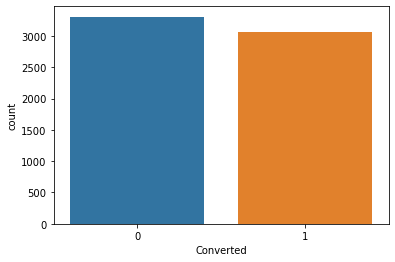

In [245]:
sns.countplot(leads["Converted"])
plt.show()

In [ ]:
sns.countplot(leads["Converted"], hue=)

### Inference :

### This is a fairly balanced dataframe to go about - since the traget varibale is balanced at 52 - 48 ratio

# Splitting the DataFrme into - Numerical & Non Numerical Sub Set of Easy Data Preparation

In [138]:
leads_numeric = leads.select_dtypes(include = np.number)
leads_categorical = leads.select_dtypes(exclude = np.number)

leads_numeric.shape, leads_categorical.shape

((6373, 4), (6373, 8))

#### Checking for the outliers in the numerical columns

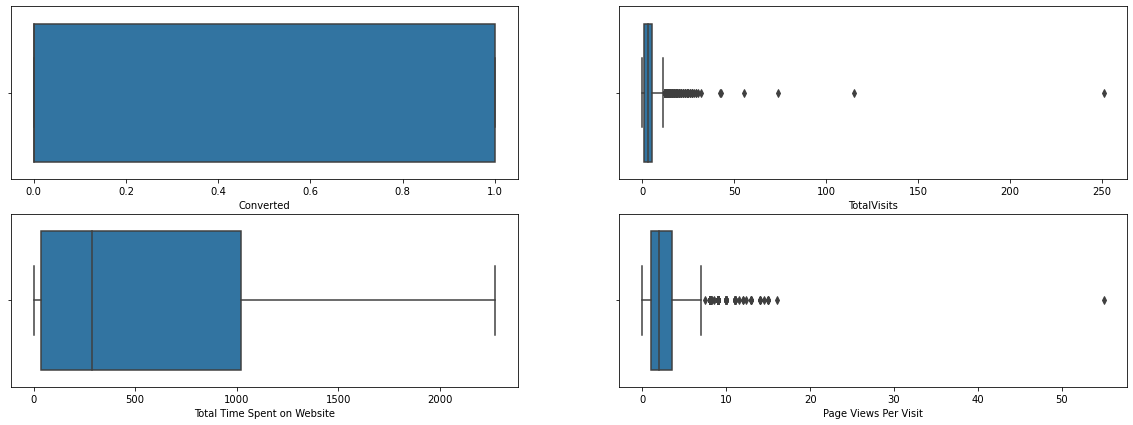

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6373.000000,6373.000000,6373.000000,6373.000000
mean,0.480935,3.624196,535.224541,2.480464
std,0.499676,5.048555,565.374753,2.167364
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,34.000000,1.000000
50%,0.000000,3.000000,287.000000,2.000000
75%,1.000000,5.000000,1022.000000,3.500000
max,1.000000,251.000000,2272.000000,55.000000


In [139]:
# Plotting the numerical variables for outliers

plt.figure(figsize =[20,7])
for ind,var in enumerate(leads_numeric.columns):
    plt.subplot(2,2,ind+1)
    sns.boxplot(leads_numeric[var])
plt.show()

leads_numeric.describe()

* ### TotalVisits & Page Views per Visits are will be influenced by the Outliers, 
* Lets cap these two variables to its 99th Percentile 
* So that we can pretty much generalise these varaibles and it does not have a skew-effect the model

In [140]:
cap = np.percentile(leads_numeric['Page Views Per Visit'], q = 99)
leads_numeric['Page Views Per Visit'] = leads_numeric['Page Views Per Visit'].apply(lambda x: cap if x > cap else x)

In [141]:
cap = np.percentile(leads_numeric['TotalVisits'], q = 99)
leads_numeric['TotalVisits'] = leads_numeric['TotalVisits'].apply(lambda x: cap if x > cap else x)

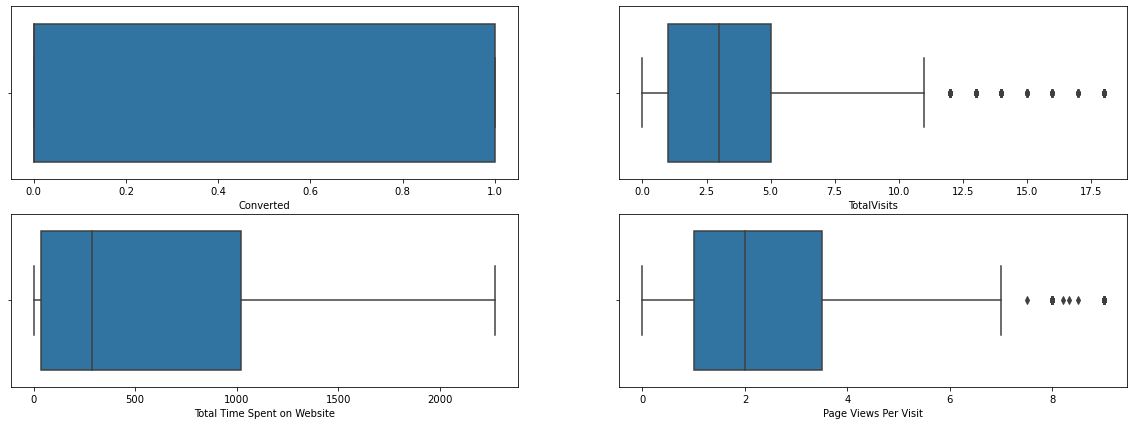

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6373.000000,6373.000000,6373.000000,6373.000000
mean,0.480935,3.513102,535.224541,2.452169
std,0.499676,3.334184,565.374753,1.978670
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,34.000000,1.000000
50%,0.000000,3.000000,287.000000,2.000000
75%,1.000000,5.000000,1022.000000,3.500000
max,1.000000,18.000000,2272.000000,9.000000


In [142]:
# Plotting the numerical variables after outliers-treatment

plt.figure(figsize =[20,7])
for ind,var in enumerate(leads_numeric.columns):
    plt.subplot(2,2,ind+1)
    sns.boxplot(leads_numeric[var])
plt.show()

leads_numeric.describe()

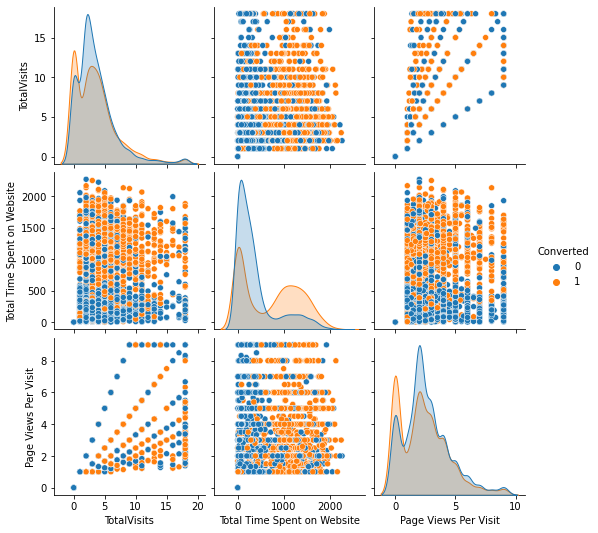

In [143]:
sns.pairplot(data = leads_numeric, hue = 'Converted')
plt.show()

### Now the Numeric variables are pretty-much Aligned

### Handling the Categorical Varibales

In [144]:
leads_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Lead Origin                             6373 non-null   object
 1   Lead Source                             6373 non-null   object
 2   Do Not Email                            6373 non-null   object
 3   Last Activity                           6373 non-null   object
 4   Specialization                          6373 non-null   object
 5   What is your current occupation         6373 non-null   object
 6   A free copy of Mastering The Interview  6373 non-null   object
 7   Last Notable Activity                   6373 non-null   object
dtypes: object(8)
memory usage: 706.1+ KB


In [145]:
# lets look at the unique - values status
see_unique_values(leads_categorical)

,cols,unique_value_count,list of unique values,% distribution of uniqiue_values
4,Specialization,19,"[Select, Finance Management, Human Resource Ma...","[29.0, 12.0, 10.0, 10.0, 6.0, 5.0, 4.0, 4.0, 4..."
1,Lead Source,16,"[Google, Direct Traffic, Olark Chat, Organic S...","[32.0, 29.0, 14.0, 14.0, 7.0, 2.0, 1.0, 0.0, 0..."
3,Last Activity,16,"[Email Opened, SMS Sent, Olark Chat Conversati...","[39.0, 34.0, 7.0, 7.0, 5.0, 3.0, 3.0, 1.0, 1.0..."
7,Last Notable Activity,14,"[Email Opened, Modified, SMS Sent, Page Visite...","[32.0, 31.0, 29.0, 3.0, 2.0, 1.0, 1.0, 0.0, 0...."
5,What is your current occupation,6,"[Unemployed, Working Professional, Student, Ot...","[86.0, 11.0, 3.0, 0.0, 0.0, 0.0]"
0,Lead Origin,4,"[Landing Page Submission, API, Lead Add Form, ...","[57.0, 34.0, 9.0, 0.0]"
2,Do Not Email,2,"[No, Yes]","[93.0, 7.0]"
6,A free copy of Mastering The Interview,2,"[No, Yes]","[66.0, 34.0]"


#### Note : We can still See the level 'Select' in the specialization column, since it carries a meaning in that column in the context, lets contiue with that

### Creating Dummies for Categorical Variables

In [146]:
leads_categorical_dummies = pd.get_dummies(leads_categorical,drop_first = True)

In [147]:
leads_categorical_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 71 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Lead Origin_Landing Page Submission                   6373 non-null   uint8
 1   Lead Origin_Lead Add Form                             6373 non-null   uint8
 2   Lead Origin_Lead Import                               6373 non-null   uint8
 3   Lead Source_Direct Traffic                            6373 non-null   uint8
 4   Lead Source_Facebook                                  6373 non-null   uint8
 5   Lead Source_Google                                    6373 non-null   uint8
 6   Lead Source_Live Chat                                 6373 non-null   uint8
 7   Lead Source_Olark Chat                                6373 non-null   uint8
 8   Lead Source_Organic Search                            6373 non-null   uint8
 9

#### Now the Categorical variables are conversted to its dummies -- > binary form - This looks good

### Lets Merge the categorical and Numerical sub set into one DataFrame for further Processing

In [148]:
leads_prepared = pd.concat([leads_numeric,leads_categorical_dummies], axis = 1)

In [149]:
leads_prepared.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,...,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000
mean,0.480935,3.513102,535.224541,2.452169,0.568806,0.091166,0.004237,0.293896,0.004394,0.321356,...,0.319787,0.000157,0.002040,0.305508,0.011925,0.033422,0.293268,0.003452,0.004864,0.000157
std,0.499676,3.334184,565.374753,1.978670,0.495282,0.287867,0.064956,0.455581,0.066143,0.467034,...,0.466430,0.012526,0.045122,0.460658,0.108558,0.179751,0.455296,0.058657,0.069580,0.012526
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,34.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,287.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,5.000000,1022.000000,3.500000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,18.000000,2272.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Lets look at the correlations in independant variables

In [150]:
X = leads_prepared.drop(['Converted'], axis = 1)
corr = X.corr()

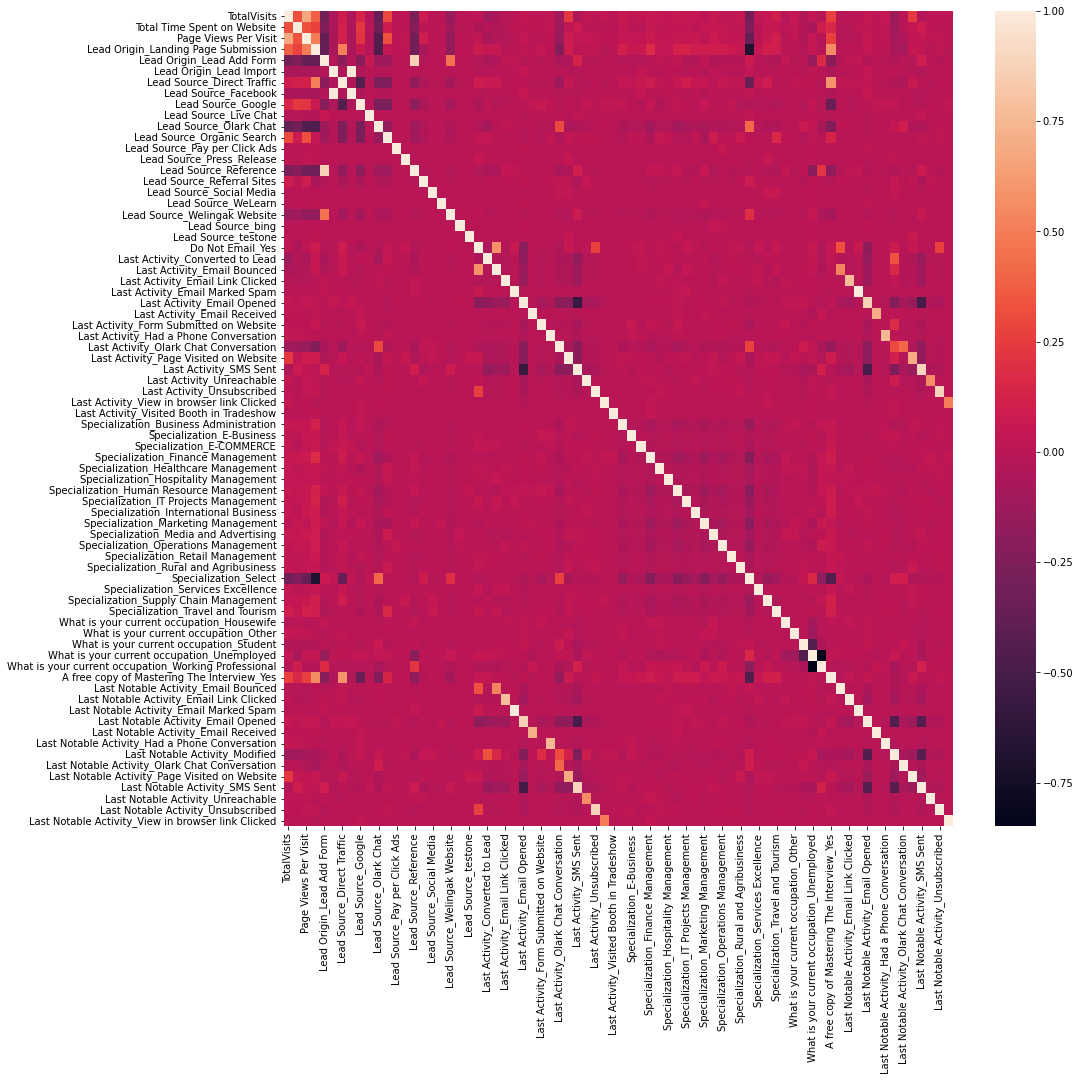

In [151]:
plt.figure(figsize = (15,15))
sns.heatmap(X.corr())
plt.show()

### Note : Since the number of varibales are very high the heatman is not easily readable - So, lets look at something else

### Lets Look at the Top 10 Correlations between the Independant Variables

In [152]:
# Top 10 Correlations

corr_df = corr.unstack().rename('correlation_value').reset_index()

corr_df = corr_df[~(corr_df['level_0'] == corr_df['level_1'])]

corr_df['duplicatedVar'] = (corr_df[['level_0','level_1']].values.tolist())
corr_df['duplicatedVar'] = corr_df['duplicatedVar'].apply(lambda x : sorted(x))

corr_df = corr_df[~corr_df['duplicatedVar'].duplicated( keep = 'first')]
corr_df = corr_df.drop('duplicatedVar', axis = 1)

corr_df['direction'] = corr_df['correlation_value'].apply(lambda x : 'Positive' if x > 0 else 'Negative' if x < 0 else 'No Correlation' )
corr_df['abs_value'] = corr_df['correlation_value'].abs()

corr_df.sort_values(by = 'abs_value', ascending = False, inplace = True)
corr_df.head(10)

,level_0,level_1,correlation_value,direction,abs_value
1913,Last Activity_Email Marked Spam,Last Notable Activity_Email Marked Spam,1.000000,Positive,1.000000
377,Lead Origin_Lead Import,Lead Source_Facebook,0.981903,Positive,0.981903
2438,Last Activity_SMS Sent,Last Notable Activity_SMS Sent,0.890591,Positive,0.890591
2588,Last Activity_Unsubscribed,Last Notable Activity_Unsubscribed,0.879716,Positive,0.879716
1988,Last Activity_Email Opened,Last Notable Activity_Email Opened,0.866192,Positive,0.866192
310,Lead Origin_Lead Add Form,Lead Source_Reference,0.862980,Positive,0.862980
4351,What is your current occupation_Unemployed,What is your current occupation_Working Profes...,-0.848996,Negative,0.848996
1838,Last Activity_Email Link Clicked,Last Notable Activity_Email Link Clicked,0.781836,Positive,0.781836
2212,Last Activity_Had a Phone Conversation,Last Notable Activity_Had a Phone Conversation,0.751218,Positive,0.751218
2063,Last Activity_Email Received,Last Notable Activity_Email Received,0.707051,Positive,0.707051


### Note : We can see there are many variales are muti-collinear , Any how we hope VIF would help us get over the these realationships

# Train Test Split

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
# Defining the Predictors and label of the dataset for train & test Splitting

X = leads_prepared.drop(['Converted'], axis = 1)
y = leads_prepared['Converted']

In [155]:
# Splitting the dataframe into training and test with training size = 70 % 

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7, random_state = 100)
print('\nTrain Set Shape : ',X_train.shape, y_train.shape)
print('\nTest Set Shape : ',X_test.shape,y_test.shape)


Train Set Shape :  (4461, 74) (4461,)

Test Set Shape :  (1912, 74) (1912,)


# Lets Normalise the Training DataSet

### We choose MinMax Scalar for the prepocessing - Normalisation

In [156]:
# Importing the MixMax Scaler class and creating a scaler object

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [157]:
# Fit_transform the X_variables writing that back to the data frame

X_train[:] = scaler.fit_transform(X_train) 

# Using the slier operation for assigning scalled values to the dataframe to preserve the dataframe structure otherwise it will overwritten as a numpy array

### Note : y variable is aleardy scaled as the values are districtly 0's and 1s.

# Lets Build the Logistic Regression Model

### Feature Selection Using RFE

In [158]:
# importing the logistic regression Class from skleran and creating an object for fitting the RFE class that will be used next

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [159]:
# Importing RFE Class from sklearn aand creating an RFE object, with feature selection = 15, estimator = Logitsic Regress Object

from sklearn.feature_selection import RFE
rfe = RFE(estimator = logreg,n_features_to_select = 15)

In [160]:
# Fitting the rfe object training set

rfe = rfe.fit(X_train,y_train)

In [161]:
# Displaying the RFE output & Rankings in a Dataframe

pd.DataFrame({'variable':X_train.columns,'rfe_support_':rfe.support_,'rfe_ranking_':rfe.ranking_})

,variable,rfe_support_,rfe_ranking_
0,TotalVisits,True,1
1,Total Time Spent on Website,True,1
2,Page Views Per Visit,False,7
3,Lead Origin_Landing Page Submission,False,2
4,Lead Origin_Lead Add Form,True,1
...,...,...,...
69,Last Notable Activity_Page Visited on Website,False,22
70,Last Notable Activity_SMS Sent,True,1
71,Last Notable Activity_Unreachable,True,1
72,Last Notable Activity_Unsubscribed,False,36


In [162]:
# Selecting the RFE identified columns with rfe.support_ attribute of the Class

selected_cols = X_train.columns[rfe.support_]

In [163]:
selected_cols

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [164]:
# Reducing the X_train to the realevant columns suggesed by the RFE

X_train = X_train[selected_cols]

# Buiding the Models using StatsModel - GLM 

In [165]:
# Importing the StatsModel Api

import statsmodels.api as sm

### User Defined Function for Model Creation

In [166]:
# User defined function to create models using statsModels are we are going to reapet the process till we gat a good model

def sm_log_model():
    X_train_sm = sm.add_constant(X_train)
    log_model = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
    log_model = log_model.fit()
    return log_model

### User Defined Function to Calcukate the IVF

In [167]:
# User Defined function to see the VIF of the variables - as are going to repeat this procees till we get a good model

from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(train_df):
    vif_df = pd.DataFrame()
    vif_df['var'] = train_df.columns
    vif_df['value'] = [variance_inflation_factor(train_df.values, i) for i in range(train_df.shape[1])]
    vif_df['value'] = vif_df['value'].round(2)
    vif_df.sort_values(by = 'value', ascending = False, inplace = True)
    return vif_df

### Model 1

In [168]:
model1 = sm_log_model()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2036.5
Date:                Tue, 02 Aug 2022   Deviance:                       4072.9
Time:                        20:54:14   Pearson chi2:                 4.68e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3493      0.101    -23.361      0.000      -2.546      -2.152
TotalVisits                                              1.2727      0.239      5.326      0.000       0.804       1.741
Total Time Spent on Website                              4.4219      0.186     23.751      0.000       4.057       4.787
Lead Origin_Lead Add Form                                4.3438      0.262     16.585      0.000       3.830       4.857
Lead Source_Olark Chat                                   1.7178      0.132     13.049      0.000       1.460       1.976
Lead Source_Welingak Website                             2.1755      1.037      2.097      0.036       0.143       4.209
Do Not Email_Yes                                        -1.3898      0.220     -6.304      0.000      -1.822      -0.958
Last Activity_Email Bounced                             -1.5592      0.659     -2.365      0.018      -2.852      -0.267
Last Activity_Had a Phone Conversation                   0.9123      0.985      0.927      0.354      -1.017       2.842
Last Activity_Olark Chat Conversation                   -1.0394      0.183     -5.669      0.000      -1.399      -0.680
What is your current occupation_Housewife               23.9102   2.44e+04      0.001      0.999   -4.78e+04    4.78e+04
What is your current occupation_Working Professional     2.5756      0.199     12.953      0.000       2.186       2.965
Last Notable Activity_Email Bounced                      2.0314      0.795      2.557      0.011       0.474       3.589
Last Notable Activity_Had a Phone Conversation          23.1373   2.08e+04      0.001      0.999   -4.07e+04    4.08e+04
Last Notable Activity_SMS Sent                           1.2036      0.088     13.644      0.000       1.031       1.376
Last Notable Activity_Unreachable                        2.6867      0.806      3.332      0.001       1.106       4.267
========================================================================================================================
"""

#### There are quite a few variable which have a p-value greater than 0.05. We will need to take care of them. But first, let's also look at the VIFs.

In [169]:
vif(X_train)

,var,value
7,Last Activity_Had a Phone Conversation,2.44
12,Last Notable Activity_Had a Phone Conversation,2.43
6,Last Activity_Email Bounced,1.93
1,Total Time Spent on Website,1.91
0,TotalVisits,1.84
5,Do Not Email_Yes,1.64
2,Lead Origin_Lead Add Form,1.48
13,Last Notable Activity_SMS Sent,1.44
11,Last Notable Activity_Email Bounced,1.37
4,Lead Source_Welingak Website,1.32


#### VIF seems ok , Lets Drop 'Last Activity_Had a Phone Conversation' having high p-value

In [170]:
drop_col = 'Last Activity_Had a Phone Conversation'

X_train.drop(drop_col, axis = 1, inplace = True)

### Model 2

In [171]:
model2 = sm_log_model()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2036.9
Date:                Tue, 02 Aug 2022   Deviance:                       4073.8
Time:                        20:54:15   Pearson chi2:                 4.68e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3479      0.101    -23.351      0.000      -2.545      -2.151
TotalVisits                                              1.2750      0.239      5.336      0.000       0.807       1.743
Total Time Spent on Website                              4.4237      0.186     23.764      0.000       4.059       4.789
Lead Origin_Lead Add Form                                4.3428      0.262     16.582      0.000       3.829       4.856
Lead Source_Olark Chat                                   1.7172      0.132     13.044      0.000       1.459       1.975
Lead Source_Welingak Website                             2.1759      1.037      2.098      0.036       0.143       4.209
Do Not Email_Yes                                        -1.3910      0.220     -6.310      0.000      -1.823      -0.959
Last Activity_Email Bounced                             -1.5607      0.659     -2.367      0.018      -2.853      -0.268
Last Activity_Olark Chat Conversation                   -1.0411      0.183     -5.679      0.000      -1.400      -0.682
What is your current occupation_Housewife               23.9082   2.44e+04      0.001      0.999   -4.78e+04    4.78e+04
What is your current occupation_Working Professional     2.5781      0.199     12.970      0.000       2.189       2.968
Last Notable Activity_Email Bounced                      2.0316      0.795      2.556      0.011       0.474       3.589
Last Notable Activity_Had a Phone Conversation          24.0467   2.08e+04      0.001      0.999   -4.07e+04    4.08e+04
Last Notable Activity_SMS Sent                           1.2014      0.088     13.625      0.000       1.029       1.374
Last Notable Activity_Unreachable                        2.6846      0.806      3.329      0.001       1.104       4.265
========================================================================================================================
"""

In [172]:
vif(X_train)

,var,value
6,Last Activity_Email Bounced,1.93
1,Total Time Spent on Website,1.90
0,TotalVisits,1.84
5,Do Not Email_Yes,1.64
2,Lead Origin_Lead Add Form,1.48
12,Last Notable Activity_SMS Sent,1.44
10,Last Notable Activity_Email Bounced,1.37
4,Lead Source_Welingak Website,1.32
9,What is your current occupation_Working Profes...,1.21
3,Lead Source_Olark Chat,1.20


### p-value looks good again, lets drop - 'What is your current occupation_Housewife'

In [173]:
drop_col = 'What is your current occupation_Housewife'

X_train.drop(drop_col, axis = 1, inplace = True)

### Model 3

In [174]:
model3 = sm_log_model()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2043.2
Date:                Tue, 02 Aug 2022   Deviance:                       4086.4
Time:                        20:54:15   Pearson chi2:                 4.69e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3339      0.100    -23.289      0.000      -2.530      -2.137
TotalVisits                                              1.2586      0.239      5.273      0.000       0.791       1.726
Total Time Spent on Website                              4.4226      0.186     23.792      0.000       4.058       4.787
Lead Origin_Lead Add Form                                4.3453      0.262     16.609      0.000       3.833       4.858
Lead Source_Olark Chat                                   1.7070      0.131     12.988      0.000       1.449       1.965
Lead Source_Welingak Website                             2.1622      1.037      2.085      0.037       0.129       4.195
Do Not Email_Yes                                        -1.3941      0.220     -6.326      0.000      -1.826      -0.962
Last Activity_Email Bounced                             -1.5665      0.659     -2.376      0.017      -2.858      -0.275
Last Activity_Olark Chat Conversation                   -1.0468      0.183     -5.711      0.000      -1.406      -0.688
What is your current occupation_Working Professional     2.5714      0.199     12.939      0.000       2.182       2.961
Last Notable Activity_Email Bounced                      2.0333      0.794      2.559      0.010       0.476       3.590
Last Notable Activity_Had a Phone Conversation          23.0393   1.26e+04      0.002      0.999   -2.47e+04    2.47e+04
Last Notable Activity_SMS Sent                           1.1930      0.088     13.542      0.000       1.020       1.366
Last Notable Activity_Unreachable                        2.6750      0.806      3.318      0.001       1.095       4.255
========================================================================================================================
"""

In [175]:
vif(X_train)

,var,value
6,Last Activity_Email Bounced,1.93
1,Total Time Spent on Website,1.90
0,TotalVisits,1.84
5,Do Not Email_Yes,1.64
2,Lead Origin_Lead Add Form,1.47
11,Last Notable Activity_SMS Sent,1.44
9,Last Notable Activity_Email Bounced,1.37
4,Lead Source_Welingak Website,1.32
8,What is your current occupation_Working Profes...,1.21
3,Lead Source_Olark Chat,1.20


#### p-value looks good again, lets drop - 'Last Notable Activity_Had a Phone Conversation'

In [176]:
drop_col = 'Last Notable Activity_Had a Phone Conversation'

X_train.drop(drop_col, axis = 1, inplace = True)

### Model 4

In [177]:
model4 = sm_log_model()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2052.9
Date:                Tue, 02 Aug 2022   Deviance:                       4105.8
Time:                        20:54:16   Pearson chi2:                 4.70e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3264      0.100    -23.294      0.000      -2.522      -2.131
TotalVisits                                              1.3105      0.237      5.528      0.000       0.846       1.775
Total Time Spent on Website                              4.4006      0.185     23.750      0.000       4.037       4.764
Lead Origin_Lead Add Form                                4.3411      0.262     16.601      0.000       3.829       4.854
Lead Source_Olark Chat                                   1.7041      0.131     12.990      0.000       1.447       1.961
Lead Source_Welingak Website                             2.1633      1.037      2.086      0.037       0.130       4.196
Do Not Email_Yes                                        -1.4020      0.220     -6.369      0.000      -1.833      -0.971
Last Activity_Email Bounced                             -1.5653      0.659     -2.376      0.018      -2.857      -0.274
Last Activity_Olark Chat Conversation                   -1.0555      0.183     -5.760      0.000      -1.415      -0.696
What is your current occupation_Working Professional     2.5678      0.199     12.933      0.000       2.179       2.957
Last Notable Activity_Email Bounced                      2.0280      0.794      2.554      0.011       0.471       3.585
Last Notable Activity_SMS Sent                           1.1813      0.088     13.432      0.000       1.009       1.354
Last Notable Activity_Unreachable                        2.6599      0.806      3.300      0.001       1.080       4.240
========================================================================================================================
"""

In [178]:
vif(X_train)

,var,value
6,Last Activity_Email Bounced,1.93
1,Total Time Spent on Website,1.90
0,TotalVisits,1.83
5,Do Not Email_Yes,1.64
2,Lead Origin_Lead Add Form,1.47
10,Last Notable Activity_SMS Sent,1.43
9,Last Notable Activity_Email Bounced,1.37
4,Lead Source_Welingak Website,1.32
8,What is your current occupation_Working Profes...,1.21
3,Lead Source_Olark Chat,1.20


### Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

# Model Evaluation

#### The Best Model based on P-Values & VIF is Model 4

In [179]:
final_model = model4

### Predicting the Training y

In [180]:
X_train_sm = sm.add_constant(X_train) # adding the constant as the statsmodel does not add contant by deafult
y_train_pred = final_model.predict(X_train_sm)

#### Lets Create a Predict Table for Training Data

In [181]:
train_predict_table = pd.DataFrame({'Converted':y_train,'Converted_Prob':y_train_pred})
train_predict_table.head(5)

,Converted,Converted_Prob
8003,0,0.326482
218,0,0.158026
4171,1,0.149504
4037,1,0.349267
3660,1,0.960683


### Deciding the Initial Cut off : Let 0.5 be the cut-off value for the Prediction (Initially)

In [182]:
## creating the prediction column to the dataframe
train_predict_table['Prediction'] = train_predict_table['Converted_Prob'].apply(lambda x : 1 if x > 0.5 else 0)
train_predict_table.head(5)

,Converted,Converted_Prob,Prediction
8003,0,0.326482,0
218,0,0.158026,0
4171,1,0.149504,0
4037,1,0.349267,0
3660,1,0.960683,1


### Lets Look at the Evaluation Matrix of the logistic regression

* #### Accuracy
* #### Sensitivity
* #### Specicity

In [183]:
# importing the metrics class form sklearn

from sklearn import metrics

In [184]:
# confusion metrics 

confusion = metrics.confusion_matrix(train_predict_table['Converted'],train_predict_table['Prediction'])

labels = ['Not Churn','Churn']
pd.DataFrame(data = confusion, columns = labels, index = labels)

,Not Churn,Churn
Not Churn,1920,392
Churn,551,1598


In [185]:
TP = confusion[1,1] # True Positive
TN = confusion[0,0] # True Negative

FP = confusion[0,1] # False Positive
FN = confusion[1,0] # False Negative

TP,TN,FP,FN

(1598, 1920, 392, 551)

In [186]:
# Accuracy of the model 

accuracy = metrics.accuracy_score(train_predict_table['Converted'],train_predict_table['Prediction'])

In [187]:
# Calculate the Sensitivity & Specificity

sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)

In [188]:
labels = ['accuracy','sensitivity','specificity']
values = [round(x,2) for x in [ accuracy,sensitivity,specificity]]
pd.DataFrame({'metric':labels, 'value':values})

,metric,value
0,accuracy,0.79
1,sensitivity,0.74
2,specificity,0.83


# Finding the Optimal Cutoff

### Cut-off = 0.5 was just arbitrary to loosely check the model performace. 
### But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

### User Defined Function to plot the ROC Curve 

In [189]:
def plot_roc(actual_y,probability_y):
    
    fpr, tpr, thresholds = metrics.roc_curve(actual_y, probability_y,drop_intermediate = False )
    
    auc_score = metrics.roc_auc_score(actual_y, probability_y)
    
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC Curve ( Area = %0.2f )' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    
    plt.xlabel('FP Rate or [ 1 - TN Rate ]')
    plt.ylabel('TP Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    
    plt.show()

    return None

#### Lets plot the ROC with Cut-Offs = 0.5

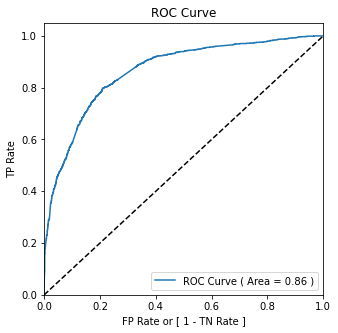

In [190]:
plot_roc(train_predict_table['Converted'],train_predict_table['Converted_Prob'])

### Inference : 
#### The area under the curve of the ROC is 0.86 which is quite good. 
#### So we seem to have a good model. 

### Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [191]:
# Let's create different probability cutoffs ranging from 0.1 to 0.9 with step = 0.1

cuts = np.arange(start = 0.1, stop = 1.0, step = 0.1)

cuts_list = [round(x,1) for x in cuts]

# Creating Prediction for all the mentioned cut-offs 

for cut_point in cuts_list :
    
    train_predict_table[cut_point] = train_predict_table['Converted_Prob'].apply(lambda x : 1 if x > cut_point else 0)

train_predict_table

,Converted,Converted_Prob,Prediction,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
8003,0,0.326482,0,1,1,1,0,0,0,0,0,0
218,0,0.158026,0,1,0,0,0,0,0,0,0,0
4171,1,0.149504,0,1,0,0,0,0,0,0,0,0
4037,1,0.349267,0,1,1,1,0,0,0,0,0,0
3660,1,0.960683,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8759,1,0.960683,1,1,1,1,1,1,1,1,1,1
100,0,0.793504,1,1,1,1,1,1,1,1,0,0
5877,0,0.915555,1,1,1,1,1,1,1,1,1,1
8658,0,0.229346,0,1,1,0,0,0,0,0,0,0


In [192]:
accuracy_list = []
sensitivity_list = []
specificity_list = []
precision_list = []
recall_list = []

for cut_point in cuts_list:
    
    confusion = metrics.confusion_matrix(train_predict_table['Converted'],train_predict_table[cut_point])
    
    TP = confusion[1,1] # True Positive
    TN = confusion[0,0] # True Negative

    FP = confusion[0,1] # False Positive
    FN = confusion[1,0] # False Negative
    
    accuracy = metrics.accuracy_score(train_predict_table['Converted'],train_predict_table[cut_point])
    
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    
    
    accuracy_list.append(accuracy)
    sensitivity_list.append(sensitivity)
    specificity_list.append(specificity)
    precision_list.append(precision)
    recall_list.append(recall)
    
trade_off_table = pd.DataFrame({'cut point':cuts_list,
             'accuracy':accuracy_list,
             'sensitivity':sensitivity_list,
             'specificity':specificity_list,
             'precision': precision_list,
             'recall': recall_list})

trade_off_table

,cut point,accuracy,sensitivity,specificity,precision,recall
0,0.1,0.531495,0.992555,0.102941,0.507012,0.992555
1,0.2,0.717104,0.939507,0.510381,0.640749,0.939507
2,0.3,0.764403,0.904607,0.634083,0.696774,0.904607
3,0.4,0.787716,0.806422,0.770329,0.765459,0.806422
4,0.5,0.788612,0.743602,0.830450,0.803015,0.743602
5,0.6,0.774266,0.670079,0.871107,0.828539,0.670079
6,0.7,0.737279,0.543974,0.916955,0.858927,0.543974
7,0.8,0.712620,0.452769,0.954152,0.901761,0.452769
8,0.9,0.643129,0.274546,0.985727,0.947030,0.274546


### Lets plot the all the metrics in the same plot

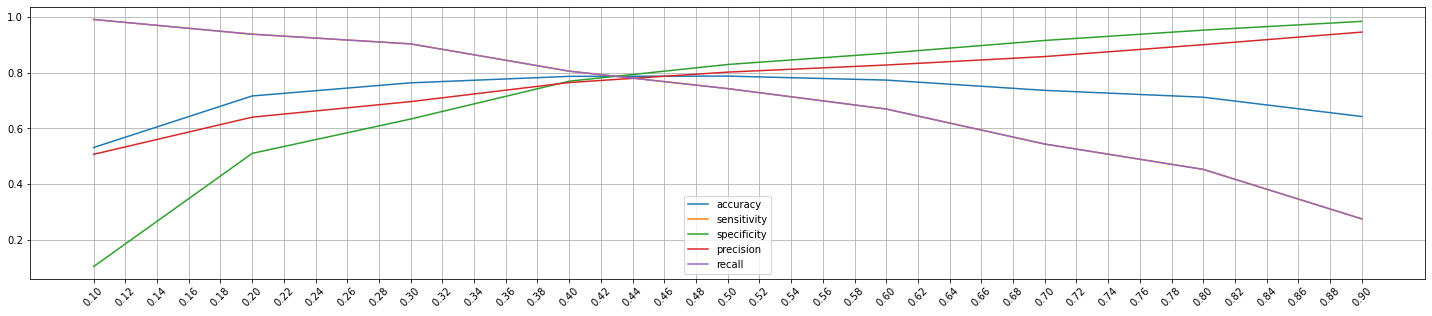

In [193]:
x = trade_off_table['cut point']
y1 = trade_off_table['accuracy']
y2 = trade_off_table['sensitivity']
y3 = trade_off_table['specificity']
y4 = trade_off_table['precision']
y5 = trade_off_table['recall']

plt.figure(figsize = [25,5])
plt.plot(x,y1, label = y1.name)
plt.plot(x,y2, label = y2.name)
plt.plot(x,y3, label = y3.name)
plt.plot(x,y4, label = y4.name)
plt.plot(x,y5, label = y5.name)
plt.xticks(np.arange(start = 0.1, stop = 0.91, step = 0.02),rotation = 45)
plt.legend()
plt.grid()
plt.show()

### Findings :

#### As you can see that around 0.43, you get the optimal values of the three metrics. So let's choose 0.43 as our cutoff now.



In [194]:
# create a final prediction column with optimal cut-offs

train_predict_table['Final_Prediction'] = train_predict_table['Converted_Prob'].apply(lambda x : 1 if x > 0.43 else 0)

In [195]:
train_predict_table.head()

,Converted,Converted_Prob,Prediction,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Prediction
8003,0,0.326482,0,1,1,1,0,0,0,0,0,0,0
218,0,0.158026,0,1,0,0,0,0,0,0,0,0,0
4171,1,0.149504,0,1,0,0,0,0,0,0,0,0,0
4037,1,0.349267,0,1,1,1,0,0,0,0,0,0,0
3660,1,0.960683,1,1,1,1,1,1,1,1,1,1,1


In [196]:
# Accuracy for the optimum cut-offs

accuracy = metrics.accuracy_score(train_predict_table['Converted'],train_predict_table['Final_Prediction'])
accuracy

0.7917507285362027

In [197]:
# Confusion matrix for the optimum cut-offs

confusion = metrics.confusion_matrix(train_predict_table['Converted'],train_predict_table['Final_Prediction'])

labels = ['Not Churn','Churn']
pd.DataFrame(data = confusion, columns = labels, index = labels)

,Not Churn,Churn
Not Churn,1832,480
Churn,449,1700


In [198]:
TP = confusion[1,1] # True Positive
TN = confusion[0,0] # True Negative

FP = confusion[0,1] # False Positive
FN = confusion[1,0] # False Negative

TP,TN,FP,FN

(1700, 1832, 480, 449)

In [199]:
# Calculation of matrics for the optimal cut-offs

sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)

In [200]:
# Displaying all the metrics together in DataFrame Format

labels = ['accuracy','sensitivity','specificity','precision','recall']
values = [round(x,2) for x in [ accuracy,sensitivity,specificity,precision,recall]]
train_metric = pd.DataFrame({'metric':labels, 
                             'train':values})
train_metric

,metric,train
0,accuracy,0.79
1,sensitivity,0.79
2,specificity,0.79
3,precision,0.78
4,recall,0.79


# Making Predictions on the test Set

In [201]:
# Transforming the test set - on the scaler object

X_test[:] = scaler.transform(X_test)

In [202]:
# Reducing the test-set to the set columns present in the final model

X_test = X_test[X_train.columns]

In [203]:
# Adding constant to the X_test for feed into statsmodel GLM

X_test_sm = sm.add_constant(X_test)

In [204]:
# Predicting the y-test 

y_test_pred = final_model.predict(X_test_sm)

In [205]:
# Creating a test-prediction table

test_predict_table = pd.DataFrame({'Converted':y_test,'Converted_Prob':y_test_pred})
test_predict_table.head(5)

,Converted,Converted_Prob
4771,1,0.996871
6122,0,0.155916
9202,0,0.727173
6570,1,0.340511
2668,1,0.498842


In [206]:
# Applying the arrived optimal cut-off in the prediction table

test_predict_table['Final_Prediction'] = test_predict_table['Converted_Prob'].apply(lambda x : 1 if x > 0.43 else 0)

In [207]:
test_predict_table.head(5)

,Converted,Converted_Prob,Final_Prediction
4771,1,0.996871,1
6122,0,0.155916,0
9202,0,0.727173,1
6570,1,0.340511,0
2668,1,0.498842,1


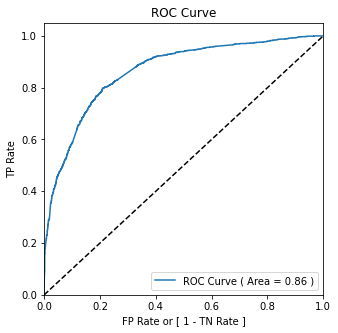

In [208]:
plot_roc(train_predict_table['Converted'],train_predict_table['Converted_Prob'])

### Checking the Metrics in the Test - Prediction

In [209]:
# accuracy score for the Test-Prediction
accuracy = metrics.accuracy_score(test_predict_table['Converted'],test_predict_table['Final_Prediction'])
accuracy

0.7860878661087866

In [210]:
# Confusion Matrics for the test-prediction
confusion = metrics.confusion_matrix(test_predict_table['Converted'],test_predict_table['Final_Prediction'])

labels = ['Not Churn','Churn']
pd.DataFrame(data = confusion, columns = labels, index = labels)

,Not Churn,Churn
Not Churn,785,211
Churn,198,718


In [211]:
TP = confusion[1,1] # True Positive
TN = confusion[0,0] # True Negative

FP = confusion[0,1] # False Positive
FN = confusion[1,0] # False Negative

TP,TN,FP,FN

(718, 785, 211, 198)

In [212]:
# Calculation of matrics for test-prediction

sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)

In [213]:
# Displaying the metrics together for the test-prediction

labels = ['accuracy','sensitivity','specificity','precision','recall']
values = [round(x,2) for x in [ accuracy,sensitivity,specificity,precision,recall]]
test_metric = pd.DataFrame({'metric':labels, 'test':values})
test_metric

,metric,test
0,accuracy,0.79
1,sensitivity,0.78
2,specificity,0.79
3,precision,0.77
4,recall,0.78


In [214]:
# Comparing the all metrics Train & Test Sets

train_metric = train_metric.set_index('metric')
test_metric = test_metric.set_index('metric')

train_test_metric_table = pd.concat([train_metric,test_metric], axis = 1)
train_test_metric_table.reset_index()

,metric,train,test
0,accuracy,0.79,0.79
1,sensitivity,0.79,0.78
2,specificity,0.79,0.79
3,precision,0.78,0.77
4,recall,0.79,0.78


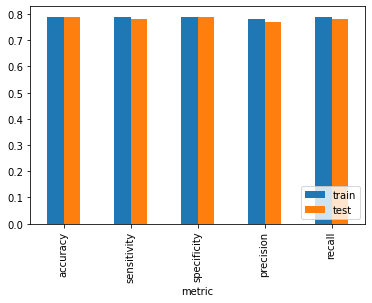

In [215]:
train_test_metric_table.plot.bar()
plt.legend(loc = 4)
plt.show()

# Inferences :

* #### Good Performance : The Model perform almost similar in the Train & Test Sets - Accuracy around 80%
* #### Low Over fitting Tendancy : This model does not seem to overfit to the training dataset
* #### Impression : Hence Capapable Making descent Prediction - Would Give confidnce to the state-holders

### Model Parameters 

In [253]:
p_parameter = final_model.params
p_Dataframe = pd.DataFrame({"parameter":p_parameter.index, "coeff":p_parameter.values})
p_Dataframe["abs_coeff"] = p_Dataframe["coeff"].abs()
p_Dataframe.sort_values(by = "abs_coeff", ascending = False, inplace = True)
p_Dataframe

,parameter,coeff,abs_coeff
2,Total Time Spent on Website,4.400629,4.400629
3,Lead Origin_Lead Add Form,4.341117,4.341117
12,Last Notable Activity_Unreachable,2.659874,2.659874
9,What is your current occupation_Working Profes...,2.567773,2.567773
0,const,-2.326410,2.326410
5,Lead Source_Welingak Website,2.163321,2.163321
10,Last Notable Activity_Email Bounced,2.028001,2.028001
4,Lead Source_Olark Chat,1.704149,1.704149
7,Last Activity_Email Bounced,-1.565348,1.565348
6,Do Not Email_Yes,-1.401966,1.401966


# End of the Notebook